<a href="https://colab.research.google.com/github/Rachanabera/Cartoonified-Image/blob/main/cartoonifiedimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IImage to Cartoonified Image Converter**

Importing the dependencies

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img

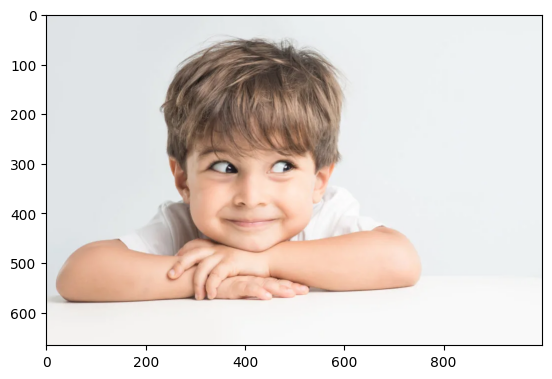

In [ ]:
filename = "/content/img.jpg"
img = read_file(filename)

or_img = np.copy(img)

In [ ]:
# Create edge mask

def edge_mark(img,line_size,blur_value):
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray,blur_value)
  edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY,line_size,blur_value)
  return edges

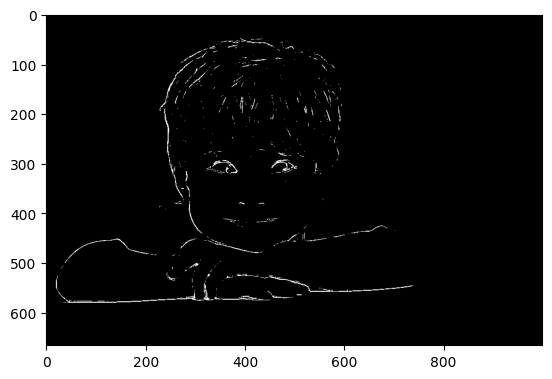

In [ ]:
line_size , blur_value = 5,7
edges = edge_mark(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()

In [ ]:
# reduce the colour pallete

def color_quantization(img,k):
  data = np.float32(img).reshape((-1,3))
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

  ret,label,center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

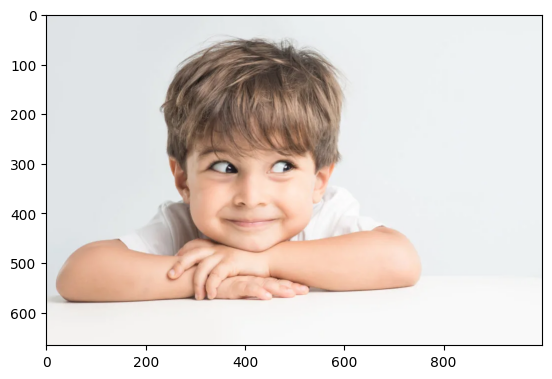

In [ ]:
img_quantiz = color_quantization(img,k=8)
plt.imshow(img)
plt.show()

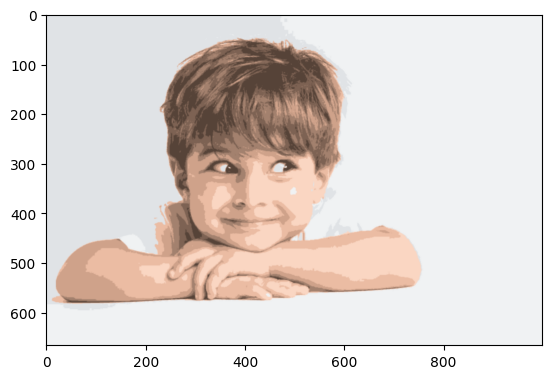

In [ ]:
# Reduce the noise

blurred = cv2.bilateralFilter(img_quantiz,d=3,sigmaColor=200,sigmaSpace=200)
plt.imshow(blurred)
plt.show()

In [ ]:
def cartoon():
  c = cv2.bitwise_and(blurred,blurred,mask=edges)
  plt.imshow(c)
  plt.title("Cartoon")
  plt.show()

  plt.imshow(or_img)
  plt.title("Original")
  plt.show()





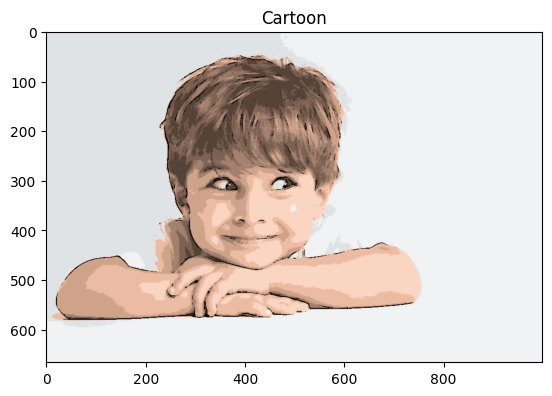

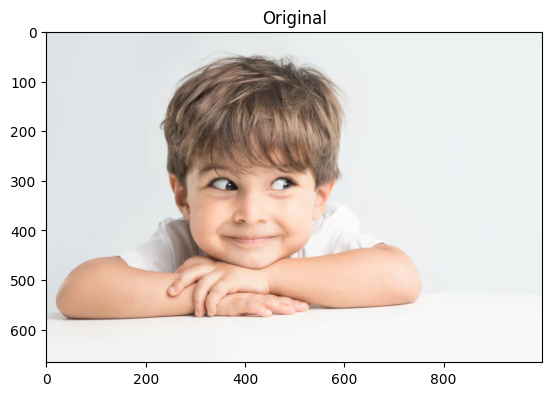

In [ ]:
cartoon()